In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Semester 6/data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Drop the 'Unnamed: 32' column as it contains only missing values
df = df.drop('Unnamed: 32', axis=1)

# Replace null values with the mode of each column
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
data = df.select_dtypes(include=['object']).copy()


In [ ]:
data.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [ ]:
t = data.columns
for col in t:
    data[col] = data[col].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   diagnosis  569 non-null    category
dtypes: category(1)
memory usage: 825.0 bytes


In [ ]:
df2 = df.copy()

In [ ]:
df2.drop(t,axis=1,inplace = True)

In [ ]:
t = data.columns

In [ ]:
data.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [ ]:

#use label encoding to convert categorical data to numerical representation
for col in t:
    data[col] = data[col].cat.codes
dataset = pd.concat([df2,data], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
data = pd.DataFrame(scaled_data, columns=dataset.columns.values)

In [ ]:
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1.0
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1.0
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1.0
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1.0
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1.0


In [ ]:

x = data.drop('diagnosis',axis=1)
y = data['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
!pip install scikeras
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from scikeras.wrappers import KerasRegressor

In [ ]:
x_train, x_test, y_train , y_test = tts(x,y,test_size=0.30, random_state = 42)

In [ ]:
# model = keras.models.Sequential()
# model.add(keras.layers.Dense(12, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
# model.add(keras.layers.Dense(8, activation='relu'))
# model.add(keras.layers.Dense(1, activation='linear'))
# model.summary()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(25, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.2467 - mae: 0.4952 - mse: 0.2467 - val_loss: 0.2426 - val_mae: 0.4909 - val_mse: 0.2426
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2406 - mae: 0.4889 - mse: 0.2406 - val_loss: 0.2355 - val_mae: 0.4835 - val_mse: 0.2355
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2341 - mae: 0.4820 - mse: 0.2341 - val_loss: 0.2288 - val_mae: 0.4758 - val_mse: 0.2288
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2308 - mae: 0.4778 - mse: 0.2308 - val_loss: 0.2220 - val_mae: 0.4678 - val_mse: 0.2220
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2214 - mae: 0.4672 - mse: 0.2214 - val_loss: 0.2149 - val_mae: 0.4591 - val_mse: 0.2149
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2130 - mae: 0.4574 - mse: 0.2130 - val_loss: 0.2077 - val_mae: 0.4509 - val_mse: 0.2077
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2047 - mae: 0.4480 - mse: 0.2047 - val_loss: 0.1998 - val_m

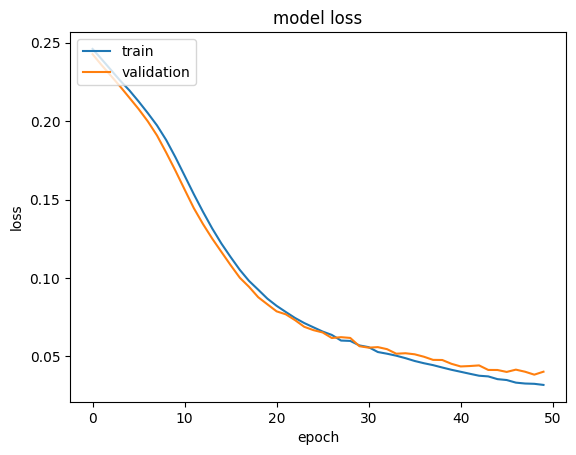

In [ ]:
# "Loss" loss: 0.0157 - mae: 0.0752 - mse: 0.0157 - val_loss: 0.0185 - val_mae: 0.0810 - val_mse: 0.0185
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred_ann = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
y_pred_ann

array([[0.19372067],
       [0.96941197],
       [0.90719384],
       [0.01683684],
       [0.00809688],
       [0.9972824 ],
       [0.9935618 ],
       [0.7658834 ],
       [0.4308568 ],
       [0.0738555 ],
       [0.10271725],
       [0.83755594],
       [0.08252103],
       [0.39727065],
       [0.09647502],
       [0.93116534],
       [0.05762186],
       [0.00452413],
       [0.00259221],
       [0.983564  ],
       [0.37067616],
       [0.04235186],
       [0.9922912 ],
       [0.01699043],
       [0.02605809],
       [0.00991134],
       [0.09528251],
       [0.04466052],
       [0.03661802],
       [0.9744921 ],
       [0.02208818],
       [0.02664411],
       [0.00705053],
       [0.09499107],
       [0.00991947],
       [0.03080134],
       [0.62555283],
       [0.03154069],
       [0.9596845 ],
       [0.12682478],
       [0.00742392],
       [0.8650026 ],
       [0.06929228],
       [0.04270324],
       [0.04202994],
       [0.10695216],
       [0.0027737 ],
       [0.013

In [ ]:
predANN = pd.DataFrame(list(zip(y_test,y_pred_ann)), columns  = ['ACTUAL', 'PREDICTED'] )
predANN

,ACTUAL,PREDICTED
0,0.0,[0.19372067]
1,1.0,[0.96941197]
2,1.0,[0.90719384]
3,0.0,[0.016836837]
4,0.0,[0.008096878]
...,...,...
166,0.0,[0.024956934]
167,0.0,[0.30937216]
168,0.0,[0.005733556]
169,1.0,[0.5389305]


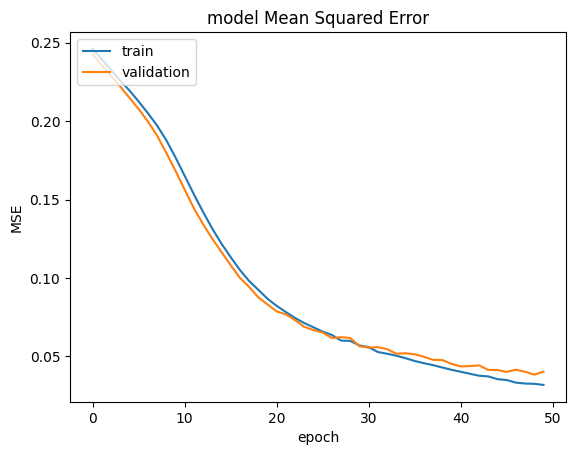

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


In [ ]:
print(history.history['mse'][14])
#final mse after 15 epochs

0.12194779515266418


In [ ]:
from sklearn.linear_model import LinearRegression as lr #import linear regression

In [ ]:
lm = lr()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
predLR = pd.DataFrame(list(zip(y_test,y_pred)), columns  = ['ACTUAL', 'PREDICTED'] )
predLR

,ACTUAL,PREDICTED
0,0.0,0.367074
1,1.0,0.803829
2,1.0,0.742990
3,0.0,-0.129154
4,0.0,-0.126580
...,...,...
166,0.0,0.080778
167,0.0,0.319917
168,0.0,0.005888
169,1.0,0.704552


In [ ]:
mseANN = mse(y_test,y_pred_ann)
mseLR = mse(y_test,y_pred)

In [ ]:
mseANN

0.03019103843273253

In [ ]:
mseLR

0.06732461252546079

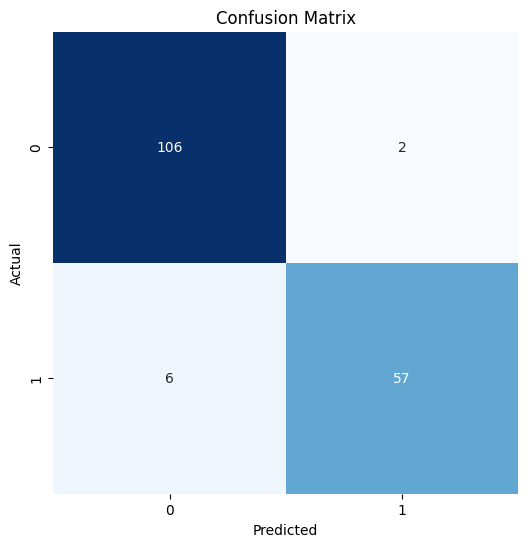

[[106   2]
 [  6  57]]


0.9532163742690059

In [ ]:
# sns.lmplot(x='Actual', y='Predicted', data=pd.DataFrame(list(zip(y_test,y_pred)),columns=['Actual','Predicted']))
# plt.title('Linear Regression')
# # from sklearn.metrics import r2_score

# # r2_ann = r2_score(y_test, y_pred_ann)
# # print(f"R-squared score for ANN: {r2_ann}")
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_binary = (y_pred > 0.5).astype(int)
confusion = confusion_matrix(y_test, y_pred_binary)
def plot_confusion_matrix(confusion_matrix, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
    # Visualize Confusion Matrices
plot_confusion_matrix(confusion, "Confusion Matrix")
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_binary)
print(cm)
accuracy_score(y_true=y_test, y_pred=y_pred_binary)

<Axes: title={'center': 'Correlation'}>

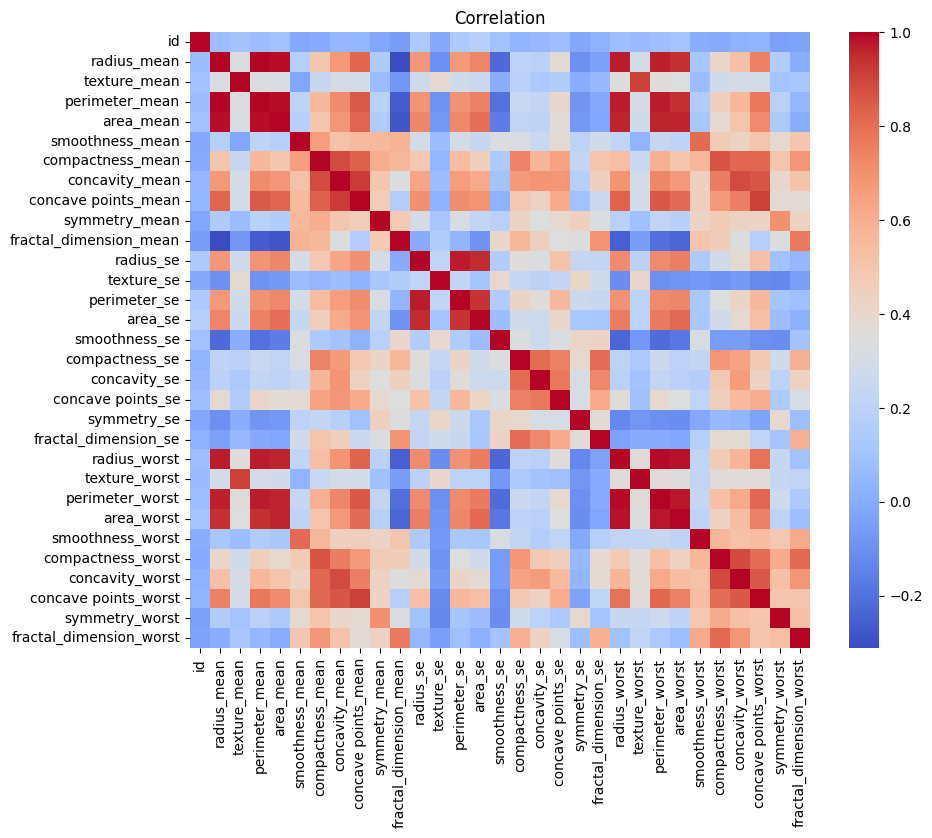

In [ ]:
plt.figure(figsize=[10,8])
plt.title('Correlation')
sns.heatmap(x.corr(), cmap='coolwarm')